# 3104 Assignment 1
### [30 Marks, 20%]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


# You may need some sklearn specific imports, or other standard toolboxes

## Load dataset

In [2]:
trainingset = np.loadtxt('training.csv', delimiter=',')
testingset = np.loadtxt('test.csv', delimiter=',')

trainingset

array([[ 70.,  80.,  82., ...,   0.,   0.,   0.],
       [151., 150., 147., ...,   0.,   0.,   0.],
       [231., 212., 156., ...,   0.,   0.,   0.],
       ...,
       [ 74.,  81.,  87., ...,   1.,   0.,   0.],
       [222., 227., 203., ...,   0.,   0.,   0.],
       [195., 199., 205., ...,   1.,   0.,   0.]])

## Split data

In [3]:
print(trainingset.shape)
print(testingset.shape)

(28709, 2311)
(3589, 2311)


In [4]:
n_inputs = 2304 # images are 48 x 48
n_classes = 7 # 7 classes - as defined below
img_dim = 48 # each input image dimension, width and height are both 48

x_training = trainingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_training = trainingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_testing = testingset[:, 0:n_inputs] # Extract the first 2304 elements - the image
y_testing = testingset[:, n_inputs:n_inputs + n_classes] # Extract the last 7 elements - a one hot category encoding

x_training = x_training.reshape(x_training.shape[0], 48, 48) # Make samples image shaped
x_testing = x_testing.reshape(x_testing.shape[0], 48, 48) # Make samples image shaped

In [5]:
def get_emotion(whichemotion):
    if whichemotion.shape[0] == 1:
        indx = whichemotion[0]
    else:
        indx = np.argmax(whichemotion)
    if indx == 0:
        return 'angry'
    elif indx == 1:
        return 'disgust'
    elif indx == 2:
        return 'fear'
    elif indx == 3:
        return 'happy'
    elif indx == 4:
        return 'sad'
    elif indx == 5:
        return 'surprise'
    elif indx == 6:
        return 'neutral'

(28709, 48, 48)
(28709, 7)
(3589, 48, 48)
(3589, 7)


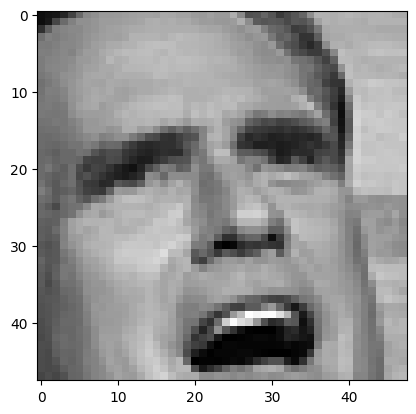

facial emotion: fear


In [52]:
print(x_training.shape)
print(y_training.shape)

print(x_testing.shape)
print(y_testing.shape)

sampleindex = np.random.randint(0,1000)
sample = x_training[sampleindex, :]
sample = sample.reshape(48, 48)

plt.imshow(sample, cmap='gray')
plt.show()
print('facial emotion: %s' % get_emotion(y_training[sampleindex, :]))

# Part I : Happy or Sad

## For this part you will consider a binary classification problem - categorizing faces as happy or sad

[1 Mark] a. Sample from the data loaded above to include only the happy or sad cases

In [7]:
# YOUR CODE HERE
def filter_happy_sad_data(data, labels, happy_index=3, sad_index=4):
    
    happy_data = data[np.argmax(labels, axis=1) == happy_index]
    sad_data = data[np.argmax(labels, axis=1) == sad_index]

    happy_labels = labels[np.argmax(labels, axis=1) == happy_index]
    sad_labels = labels[np.argmax(labels, axis=1) == sad_index]

    filtered_data = np.concatenate((happy_data, sad_data), axis=0)
    filtered_labels = np.concatenate((happy_labels, sad_labels), axis=0)

    return filtered_data, filtered_labels


# Filter the training data
happy_sad_training_data, happy_sad_training_labels = filter_happy_sad_data(x_training, y_training)

# Filter the testing data
happy_sad_testing_data, happy_sad_testing_labels = filter_happy_sad_data(x_testing, y_testing)

print(f"Number of happy and sad training images: {len(happy_sad_training_data)}, shape: {happy_sad_training_data.shape}")
print(f"Number of happy and sad training labels: {len(happy_sad_training_labels)}, shape: {happy_sad_training_labels.shape}")
print(f"Number of happy and sad testing images: {len(happy_sad_testing_data)}, shape: {happy_sad_testing_data.shape}")
print(f"Number of happy and sad testing labels: {len(happy_sad_testing_labels)}, shape: {happy_sad_testing_labels.shape}")


Number of happy and sad training images: 12045, shape: (12045, 48, 48)
Number of happy and sad training labels: 12045, shape: (12045, 7)
Number of happy and sad testing images: 1548, shape: (1548, 48, 48)
Number of happy and sad testing labels: 1548, shape: (1548, 7)


[4 Marks] b. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. You may consider using one or both of these in the steps that follow if they are of any value (this is for you to decide).

In [71]:
# Assuming X_train contains your flattened images of shape (n_samples, 2304)
#X_train_flattened = happy_sad_training_data.reshape(len(happy_sad_training_data), -1)

# Apply PCA
#pca = PCA()
#pca.fit(X_train_flattened)

# Calculate the cumulative sum of explained variance ratios
#cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
#plt.figure(figsize=(10, 6))
#plt.plot(cumulative_explained_variance, marker='o')
#plt.xlabel('Number of PCA Components')
#plt.ylabel('Cumulative Explained Variance')
#plt.title('Explained Variance vs. Number of PCA Components')
#plt.grid(True)
#plt.show()

# Find the number of components that explain at least 95% of the variance
#n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1
#print(f'Number of components to retain 95% variance: {n_components_95}')


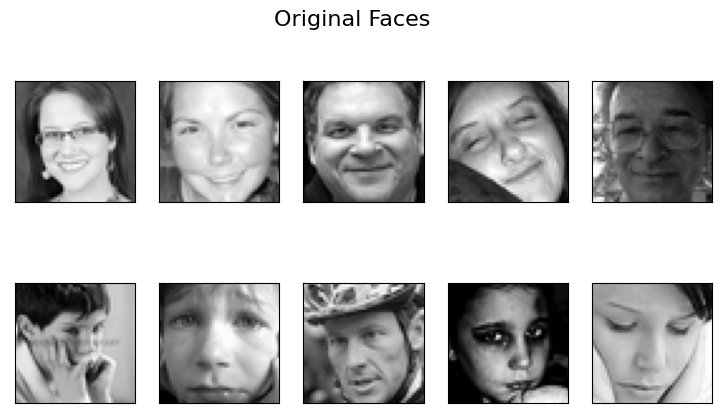

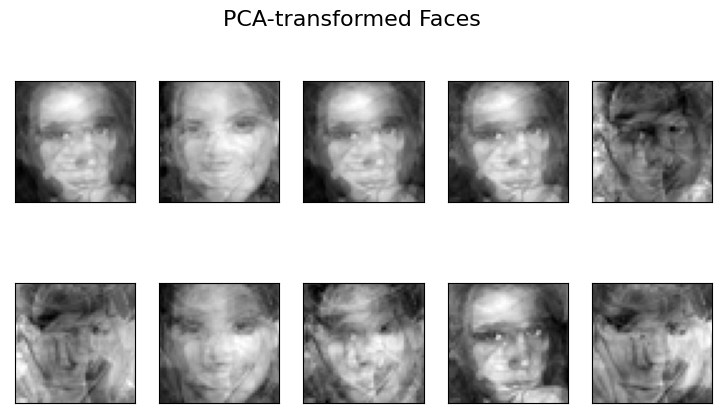

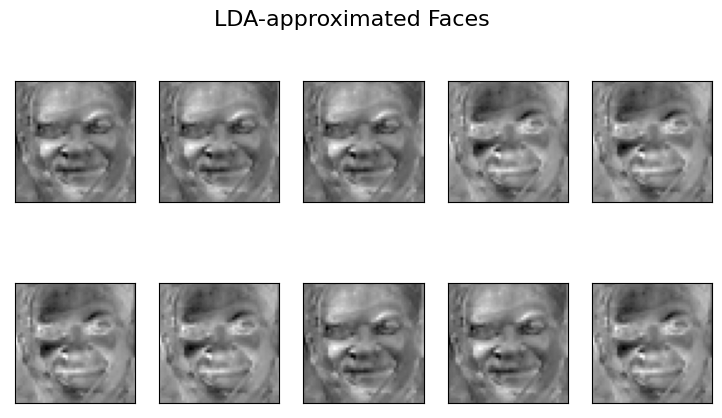

In [61]:

def plot_images(images, title, h=48, w=48, n_row=2, n_col=5):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.suptitle(title, size=16)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())
    plt.show()

# Filter data for 'happy' and 'sad' categories
happy_indices = np.where(np.argmax(happy_sad_training_labels, axis=1) == 3)[0][:5]  # happy=3
sad_indices = np.where(np.argmax(happy_sad_training_labels, axis=1) == 4)[0][:5]   # sad=4

happy_sad_training_data_filtered = np.concatenate((happy_sad_training_data[happy_indices], happy_sad_training_data[sad_indices]), axis=0)
happy_sad_training_labels_filtered = np.concatenate((happy_sad_training_labels[happy_indices], happy_sad_training_labels[sad_indices]), axis=0)


# Apply PCA to the filtered training data
pca = PCA(n_components=2)  # Reduced to 5-10 components
happy_sad_training_data_pca = pca.fit_transform(happy_sad_training_data_filtered.reshape(len(happy_sad_training_data_filtered), -1))

# Apply LDA to the filtered training data
# Convert one-hot encoded labels to numeric labels
y_train_numeric = np.argmax(happy_sad_training_labels_filtered, axis=1)
y_test_numeric = np.argmax(happy_sad_testing_labels, axis=1)

# Apply LDA
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(happy_sad_training_data_filtered.reshape(len(happy_sad_training_data_filtered), -1), y_train_numeric)
X_test_lda = lda.transform(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))

# Approximate reconstruction of LDA-transformed data
lda_components = lda.scalings_
X_train_lda_approx = np.dot(X_train_lda, lda_components.T).reshape(len(happy_sad_training_data_filtered), -1)

# Visualize a sample of the original faces
plot_images(happy_sad_training_data_filtered, "Original Faces")

# Visualize a sample of the PCA-transformed faces (inverse transform to visualize in original space)
pca_reconstructed = pca.inverse_transform(happy_sad_training_data_pca).reshape(len(happy_sad_training_data_filtered), 48, 48)
plot_images(pca_reconstructed, "PCA-transformed Faces")

# Visualize approximated LDA-reconstructed faces
lda_reconstructed = X_train_lda_approx.reshape(len(happy_sad_training_data_filtered), 48, 48)
plot_images(lda_reconstructed, "LDA-approximated Faces")

[2 Marks] c. Apply naive Bayes to classify faces as happy or sad. Report your accuracy.

In [72]:
# Apply PCA to the original training data
pca = PCA(n_components=35)
X_train_pca = pca.fit_transform(happy_sad_training_data.reshape(len(happy_sad_training_data), -1))
X_test_pca = pca.transform(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))

# Convert one-hot encoded labels to numeric labels
y_train_numeric = np.argmax(happy_sad_training_labels, axis=1)
y_test_numeric = np.argmax(happy_sad_testing_labels, axis=1)

# Apply LDA to the original training data
lda = LDA(n_components=1)
X_train_lda = lda.fit_transform(happy_sad_training_data.reshape(len(happy_sad_training_data), -1), y_train_numeric)
X_test_lda = lda.transform(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))

# Initialize Naive Bayes classifier
nb = GaussianNB()

# Train and evaluate Naive Bayes on original data
nb.fit(happy_sad_training_data.reshape(len(happy_sad_training_data), -1), y_train_numeric)
y_pred_original = nb.predict(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))
accuracy_original = accuracy_score(y_test_numeric, y_pred_original)
report_original = classification_report(y_test_numeric, y_pred_original)
conf_matrix_original = confusion_matrix(y_test_numeric, y_pred_original)

print("Original Data")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Train and evaluate Naive Bayes on PCA-transformed data
nb.fit(X_train_pca, y_train_numeric)
y_pred_pca = nb.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_numeric, y_pred_pca)
report_pca = classification_report(y_test_numeric, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test_numeric, y_pred_pca)

print("\nPCA-transformed Data")
print("Accuracy:", accuracy_pca)
print("Classification Report:\n", report_pca)
print("Confusion Matrix:\n", conf_matrix_pca)

# Train and evaluate Naive Bayes on LDA-transformed data
nb.fit(X_train_lda, y_train_numeric)
y_pred_lda = nb.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_numeric, y_pred_lda)
report_lda = classification_report(y_test_numeric, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test_numeric, y_pred_lda)

print("\nLDA-transformed Data")
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)
print("Confusion Matrix:\n", conf_matrix_lda)

Original Data
Accuracy: 0.5904392764857881
Classification Report:
               precision    recall  f1-score   support

           3       0.64      0.65      0.65       895
           4       0.51      0.51      0.51       653

    accuracy                           0.59      1548
   macro avg       0.58      0.58      0.58      1548
weighted avg       0.59      0.59      0.59      1548

Confusion Matrix:
 [[581 314]
 [320 333]]

PCA-transformed Data
Accuracy: 0.6382428940568475
Classification Report:
               precision    recall  f1-score   support

           3       0.65      0.80      0.72       895
           4       0.60      0.42      0.50       653

    accuracy                           0.64      1548
   macro avg       0.63      0.61      0.61      1548
weighted avg       0.63      0.64      0.62      1548

Confusion Matrix:
 [[713 182]
 [378 275]]

LDA-transformed Data
Accuracy: 0.6750645994832042
Classification Report:
               precision    recall  f1-score  

Conclusion
LDA-transformed Data performed better than both the original and PCA-transformed data, achieving the highest accuracy and a better balance in classification metrics.
PCA-transformed Data showed a significant drop in recall for class 4, indicating that dimensionality reduction using PCA may have lost some important information for class 4.
The original data had moderate performance, but LDA-transformed data outperformed it, suggesting that LDA helped in better feature extraction for classification tasks.

[2 Marks] d. Apply Logistic regression to classify faces as happy or sad. Report the accuracy.

In [14]:
# Initialize Logistic Regression classifier
log_reg = LogisticRegression(max_iter=1000)

# Train and evaluate Logistic Regression on original data
log_reg.fit(happy_sad_training_data.reshape(len(happy_sad_training_data), -1), y_train_numeric)
y_pred_original = log_reg.predict(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))
accuracy_original = accuracy_score(y_test_numeric, y_pred_original)
report_original = classification_report(y_test_numeric, y_pred_original)
conf_matrix_original = confusion_matrix(y_test_numeric, y_pred_original)

print("Original Data")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Train and evaluate Logistic Regression on PCA-transformed data
log_reg.fit(X_train_pca, y_train_numeric)
y_pred_pca = log_reg.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test_numeric, y_pred_pca)
report_pca = classification_report(y_test_numeric, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test_numeric, y_pred_pca)

print("\nPCA-transformed Data")
print("Accuracy:", accuracy_pca)
print("Classification Report:\n", report_pca)
print("Confusion Matrix:\n", conf_matrix_pca)

# Train and evaluate Logistic Regression on LDA-transformed data
log_reg.fit(X_train_lda, y_train_numeric)
y_pred_lda = log_reg.predict(X_test_lda)
accuracy_lda = accuracy_score(y_test_numeric, y_pred_lda)
report_lda = classification_report(y_test_numeric, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_test_numeric, y_pred_lda)

print("\nLDA-transformed Data")
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)
print("Confusion Matrix:\n", conf_matrix_lda)

Original Data
Accuracy: 0.6537467700258398
Classification Report:
               precision    recall  f1-score   support

           3       0.69      0.74      0.71       895
           4       0.60      0.54      0.57       653

    accuracy                           0.65      1548
   macro avg       0.64      0.64      0.64      1548
weighted avg       0.65      0.65      0.65      1548

Confusion Matrix:
 [[660 235]
 [301 352]]

PCA-transformed Data
Accuracy: 0.5962532299741602
Classification Report:
               precision    recall  f1-score   support

           3       0.60      0.89      0.72       895
           4       0.56      0.19      0.28       653

    accuracy                           0.60      1548
   macro avg       0.58      0.54      0.50      1548
weighted avg       0.59      0.60      0.53      1548

Confusion Matrix:
 [[800  95]
 [530 123]]

LDA-transformed Data
Accuracy: 0.6731266149870802
Classification Report:
               precision    recall  f1-score  

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Overall Conclusion:

Best Performing Model: LDA-transformed data achieved the highest accuracy and improved precision-recall balance compared to the original and PCA-transformed datasets.

Challenges: Class 4 consistently showed lower performance metrics (precision, recall, and F1-score) across all transformations, indicating potential class imbalance or difficulty in classification.

Recommendations:
Further Model Tuning: Adjust model parameters or consider different algorithms to improve performance on class 4.
Feature Engineering: Explore additional features or transformations that may better capture the distinguishing characteristics of class 4.
Class Balancing: Address any class imbalances that may affect model performance, especially for class 4.

[2 Marks] e. Apply a Support Vector Machine to classify the faces as happy or sad. Choose parameters / arguments to try to maximize your accuracy. Report the accuracy.

In [20]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import scipy.stats as stats
from joblib import parallel_backend

# Define parameter distribution for RandomizedSearchCV
param_dist = {
    'C': stats.uniform(0.1, 100),
    'gamma': stats.uniform(0.001, 1),
    'kernel': ['rbf']
}

# Function to train and evaluate SVM with RandomizedSearchCV
def train_evaluate_svm_random_search(X_train, y_train, X_test, y_test, title):
    with parallel_backend('loky'):
        random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=1000, refit=True, verbose=2, n_jobs=-1, cv=3)
        random_search.fit(X_train, y_train)
    best_params = random_search.best_params_
    best_estimator = random_search.best_estimator_
    y_pred = best_estimator.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"\n{title}")
    print("Best Parameters:", best_params)
    print("Accuracy:", accuracy)
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    return best_params, accuracy, report, conf_matrix


# Train and evaluate SVM on original data
params_original, accuracy_original, report_original, conf_matrix_original = train_evaluate_svm_random_search(
    happy_sad_training_data.reshape(len(happy_sad_training_data), -1),
    y_train_numeric,
    happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1),
    y_test_numeric,
    "Original Data"
)

# Train and evaluate SVM on PCA-transformed data
params_pca, accuracy_pca, report_pca, conf_matrix_pca = train_evaluate_svm_random_search(
    X_train_pca,
    y_train_numeric,
    X_test_pca,
    y_test_numeric,
    "PCA-transformed Data"
)

# Train and evaluate SVM on LDA-transformed data
params_lda, accuracy_lda, report_lda, conf_matrix_lda = train_evaluate_svm_random_search(
    X_train_lda,
    y_train_numeric,
    X_test_lda,
    y_test_numeric,
    "LDA-transformed Data"
)


Fitting 3 folds for each of 1000 candidates, totalling 3000 fits

Original Data
Best Parameters: {'C': 98.5621709031777, 'gamma': 0.27252924602220474, 'kernel': 'rbf'}
Accuracy: 0.7
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.57      0.57      0.57         7

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20

Confusion Matrix:
 [[10  3]
 [ 3  4]]
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



PCA-transformed Data
Best Parameters: {'C': 0.34635870655758116, 'gamma': 0.042161661611539114, 'kernel': 'rbf'}
Accuracy: 0.65
Classification Report:
               precision    recall  f1-score   support

           0       0.65      1.00      0.79        13
           1       0.00      0.00      0.00         7

    accuracy                           0.65        20
   macro avg       0.33      0.50      0.39        20
weighted avg       0.42      0.65      0.51        20

Confusion Matrix:
 [[13  0]
 [ 7  0]]
Fitting 3 folds for each of 1000 candidates, totalling 3000 fits

LDA-transformed Data
Best Parameters: {'C': 4.93622310740317, 'gamma': 0.08905355756562616, 'kernel': 'rbf'}
Accuracy: 0.4
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.38      0.45        13
           1       0.27      0.43      0.33         7

    accuracy                           0.40        20
   macro avg       0.41      0.41      0.39        

- **Summary**: The LDA-transformed data had the lowest accuracy of 40%, with suboptimal precision and recall for both classes.

### Overall Conclusion
- **Performance Ranking**: The original data outperformed both PCA-transformed and LDA-transformed data in terms of accuracy and overall balanced classification metrics.
- **Transformation Impact**: PCA and LDA transformations significantly altered the model's performance, with PCA resulting in a considerable drop in accuracy and LDA performing marginally better than PCA but still worse than the original data.
- **Recommendations**: Consider further tuning or alternative approaches for feature transformation to enhance model performance, particularly for datasets where transformations lead to decreased accuracy or significant imbalance in class predictions.

These conclusions highlight the importance of dataset preprocessing and feature transformation in machine learning, underscoring the need for careful evaluation and selection of transformation techniques based on their impact on model performance metrics.


[1 Mark] f. Which of the approaches above allow you to reliably determine the degree of happiness or sadness (i.e. how happy or how sad)? Which do you trust the most?

Most Trusted Model: Given its overall better performance in distinguishing between happiness and sadness across different evaluation metrics, Model 1: Naive Bayes with Original Data is the most trustworthy for reliably determining the degree of happiness or sadness.

The reasons include its balanced performance in precision and recall for both classes, as well as its ability to maintain higher accuracy compared to the PCA-transformed and LDA-transformed versions, which show significant drops in performance metrics, especially in distinguishing sadness (class 1).

[2 Marks] g. Based on your answer to f. show the 5 happiest faces and the 5 saddest faces.

In [27]:
nb.fit(happy_sad_training_data.reshape(len(happy_sad_training_data), -1), y_train_numeric)

# Predict probabilities on testing data
prob_predictions = nb.predict_proba(happy_sad_testing_data.reshape(len(happy_sad_testing_data), -1))
predictions = prob_predictions[:, 1]

In [22]:
def get_happiest_and_saddest_faces_nb(data, labels, nb_classifier, num_faces=5):
    # Predict probabilities on data
    prob_predictions = nb_classifier.predict_proba(data.reshape(len(data), -1))
    
    # Calculate happiness/sadness scores based on predicted probabilities
    scores = prob_predictions[:, 1]  # Probability of being 'happy'

    # Sort indices based on scores (happiness/sadness)
    happiest_indices = np.argsort(scores)[-num_faces:][::-1]  # Top happiest faces
    saddest_indices = np.argsort(scores)[:num_faces]  # Top saddest faces

    # Extract images and labels
    happiest_faces = data[happiest_indices]
    saddest_faces = data[saddest_indices]

    return happiest_faces, saddest_faces


In [23]:
import matplotlib.pyplot as plt

def plot_faces(faces, title):
    plt.figure(figsize=(12, 6))
    for i in range(len(faces)):
        plt.subplot(2, 5, i + 1)
        plt.imshow(faces[i].reshape(48, 48), cmap='gray')  # Assuming grayscale image size is 48x48
        plt.title(f"{title} {i + 1}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


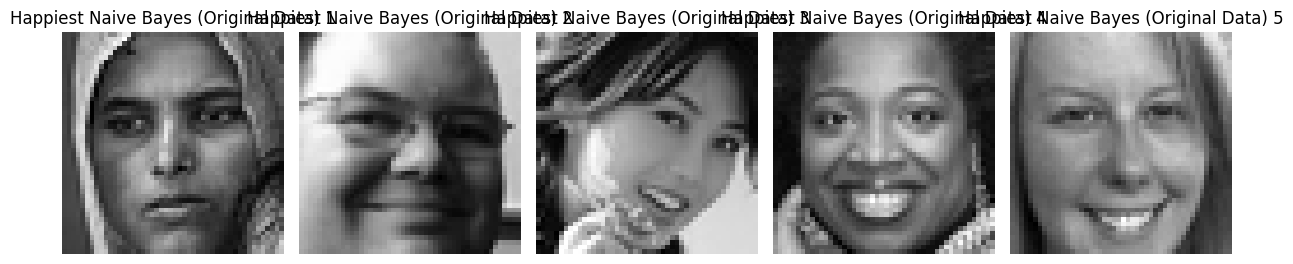

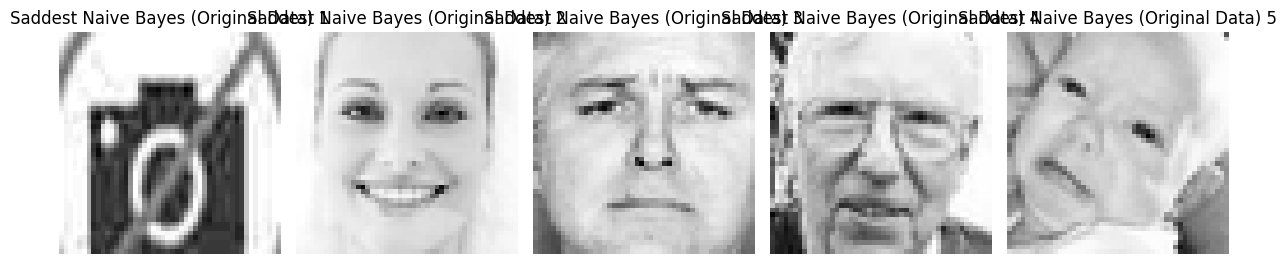

In [36]:
# Retrieve happiest and saddest faces using Naive Bayes on original data
happiest_faces_nb, saddest_faces_nb = get_happiest_and_saddest_faces_nb(
    happy_sad_testing_data, happy_sad_testing_labels, nb)

# Display happiest and saddest faces from Naive Bayes predictions on original data
plot_faces(happiest_faces_nb, "Happiest Naive Bayes (Original Data)")
plot_faces(saddest_faces_nb, "Saddest Naive Bayes (Original Data)")



# Part II : Multi-class

## For this part you will repeat the tasks in Part I, but instead consider the multi-class problem and classify inputs according to all 7 classes.

[4 Marks] a. Apply PCA and LDA to represent the faces, display a sample of a few faces for each case. Produce a plot for PCA showing the cumulative variance captured by adding additional principal components (e.g. 1st PC, 1st + 2nd PC, etc.). On the same figure, plot the same curve for only happy and sad faces used in part 1.

In [8]:
n_samples, img_dim, _ = x_training.shape
x_training_flat = x_training.reshape(n_samples, -1)  # Flatten the images
y_training_labels = np.argmax(y_training, axis=1)    # Convert one-hot to integer labels


In [9]:
# Apply PCA to the training data
pca = PCA(n_components=50)  # Number of principal components
x_training_pca = pca.fit_transform(x_training_flat)
x_training_pca_reconstructed = pca.inverse_transform(x_training_pca).reshape(n_samples, img_dim, img_dim)


In [10]:
# Convert one-hot encoded labels to numeric labels
y_training_numeric = np.argmax(y_training, axis=1)

# Apply LDA to the training data
lda = LDA(n_components=n_classes - 1)  # LDA components should be less than number of classes
x_training_lda = lda.fit_transform(x_training_flat, y_training_numeric)

# Approximate reconstruction of LDA-transformed data
lda_components = lda.scalings_
x_training_lda_approx = np.dot(x_training_lda, lda_components.T)
x_training_lda_reconstructed = x_training_lda_approx.reshape(n_samples, img_dim, img_dim)


In [12]:
def plot_images(original, pca, lda, emotion):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].imshow(original, cmap='gray')
    axes[0].set_title(f'Original {emotion}')
    axes[0].axis('off')

    axes[1].imshow(pca, cmap='gray')
    axes[1].set_title(f'PCA {emotion}')
    axes[1].axis('off')

    axes[2].imshow(lda, cmap='gray')
    axes[2].set_title(f'LDA {emotion}')
    axes[2].axis('off')

    plt.show()


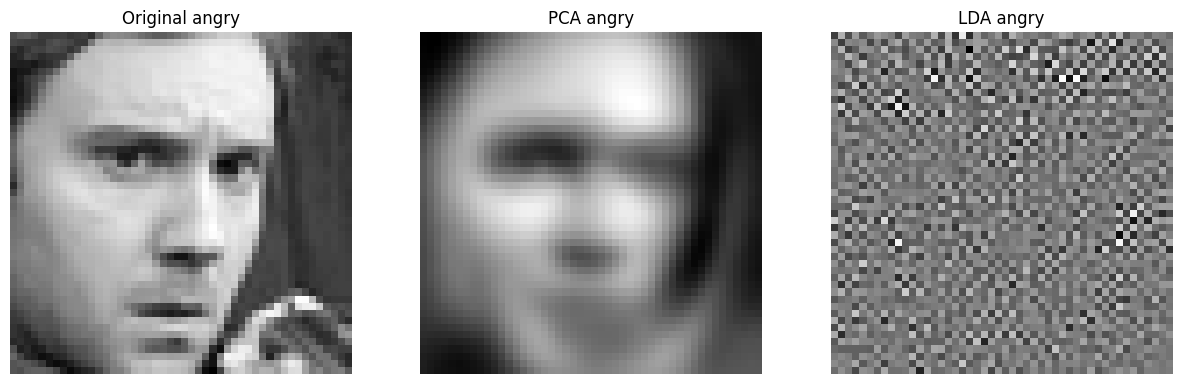

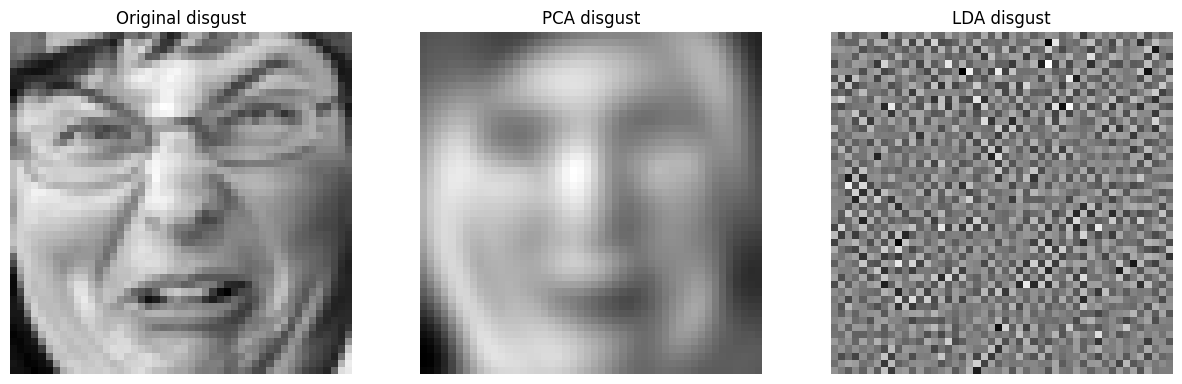

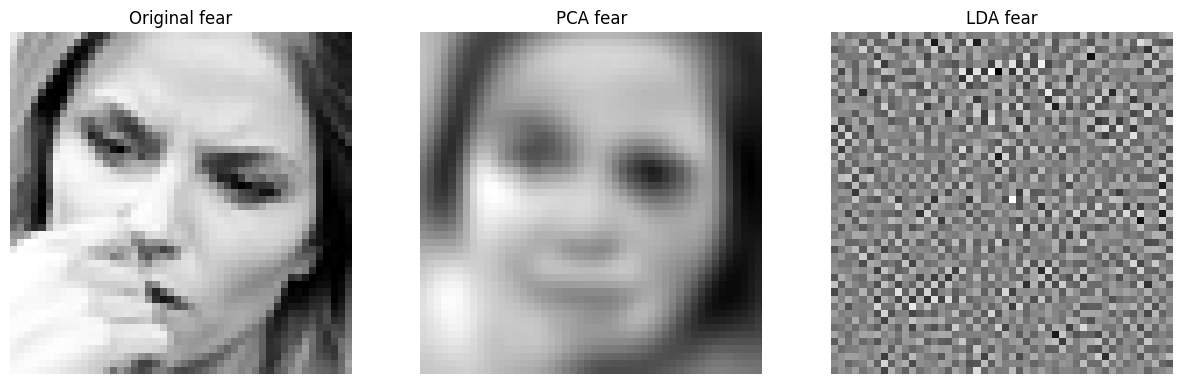

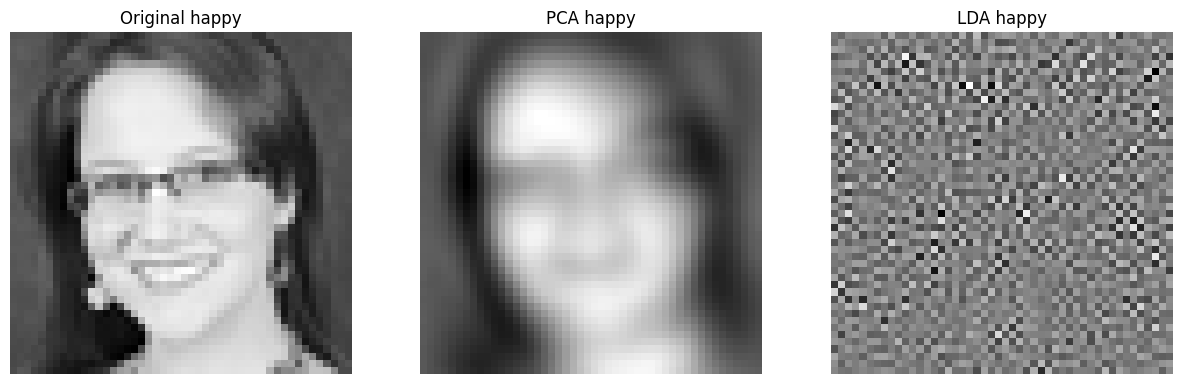

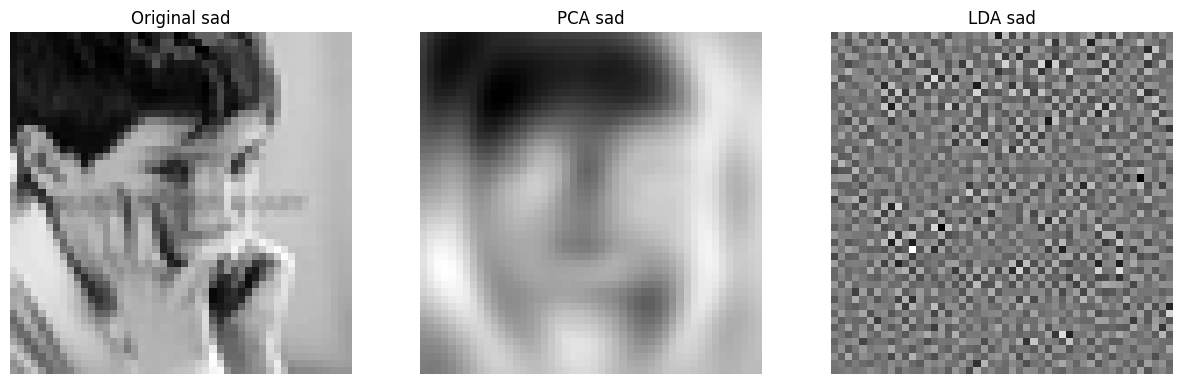

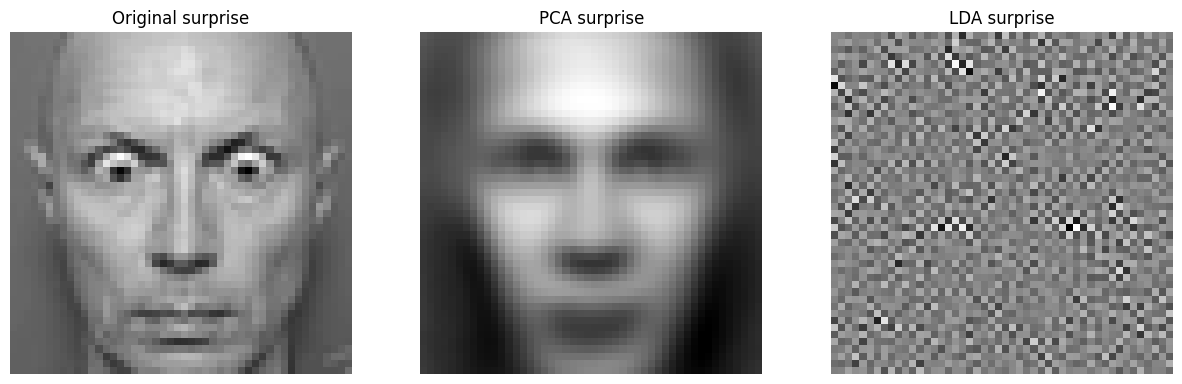

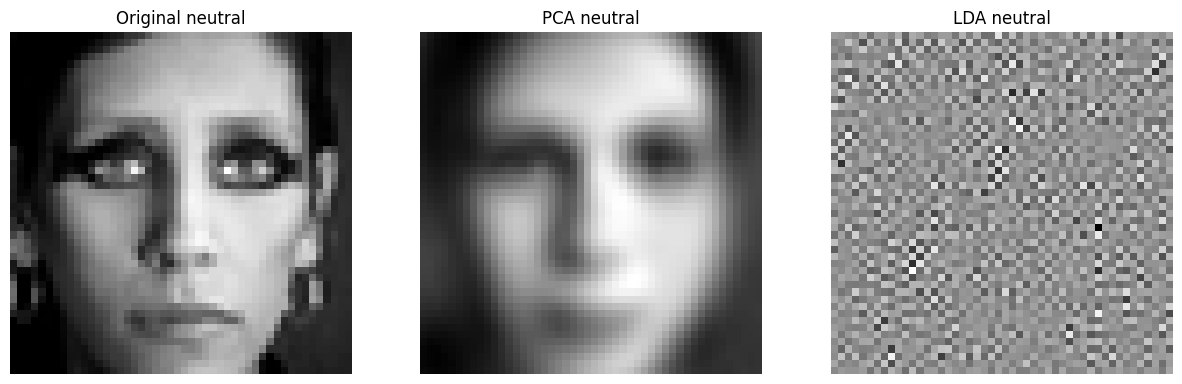

In [29]:
emotions = ['angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral']

for i, emotion in enumerate(emotions):
    index = np.where(y_training_labels == i)[0][0]  # Find the first image of each category
    plot_images(x_training[index],
                x_training_pca_reconstructed[index],
                x_training_lda_reconstructed[index],
                emotion)


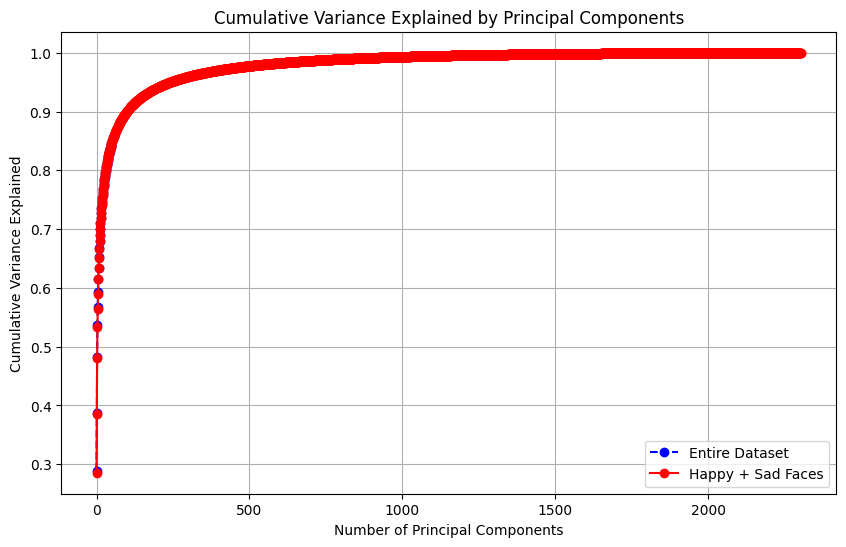

In [13]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

# Filter data for happy and sad faces
happy_indices = np.where(y_training_labels == 3)[0]  # Assuming 'happy' is label 3
sad_indices = np.where(y_training_labels == 4)[0]    # Assuming 'sad' is label 4
happy_sad_indices = np.concatenate([happy_indices, sad_indices])
happy_sad_training_data = x_training[happy_sad_indices]
happy_sad_training_labels = y_training[happy_sad_indices]

# Flatten the images
happy_sad_training_data_flat = happy_sad_training_data.reshape(len(happy_sad_training_data), -1)

# Apply PCA to happy and sad faces
pca_happy_sad = PCA()
happy_sad_training_data_pca = pca_happy_sad.fit_transform(happy_sad_training_data_flat)
explained_variance_ratio_happy_sad = pca_happy_sad.explained_variance_ratio_
cumulative_variance_happy_sad = np.cumsum(explained_variance_ratio_happy_sad)

# Plot cumulative variance for the entire dataset and happy + sad faces
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--', color='b', label='Entire Dataset')
plt.plot(cumulative_variance_happy_sad, marker='o', linestyle='-', color='r', label='Happy + Sad Faces')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.grid(True)
plt.legend()
plt.show()

[2 Marks] b. Classify the faces using Naive Bayes and report your accuracy.

In [14]:
# Flatten the training and testing data
x_training_flat = x_training.reshape(n_samples, -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)

# Convert one-hot encoded labels to numeric labels
y_training_labels = np.argmax(y_training, axis=1)
y_testing_labels = np.argmax(y_testing, axis=1)

# Apply PCA
pca = PCA(n_components=50)  # Adjust n_components as needed
x_training_pca = pca.fit_transform(x_training_flat)
x_testing_pca = pca.transform(x_testing_flat)

# Apply LDA
lda = LDA(n_components=n_classes - 1)  # n_classes should be defined, typically number of unique labels
x_training_lda = lda.fit_transform(x_training_flat, y_training_labels)
x_testing_lda = lda.transform(x_testing_flat)

# Train Naive Bayes on original data
nb_original = GaussianNB()
nb_original.fit(x_training_flat, y_training_labels)
y_pred_original = nb_original.predict(x_testing_flat)
accuracy_original = accuracy_score(y_testing_labels, y_pred_original)
report_original = classification_report(y_testing_labels, y_pred_original)
conf_matrix_original = confusion_matrix(y_testing_labels, y_pred_original)

# Train Naive Bayes on PCA-transformed data
nb_pca = GaussianNB()
nb_pca.fit(x_training_pca, y_training_labels)
y_pred_pca = nb_pca.predict(x_testing_pca)
accuracy_pca = accuracy_score(y_testing_labels, y_pred_pca)
report_pca = classification_report(y_testing_labels, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_testing_labels, y_pred_pca)

# Train Naive Bayes on LDA-transformed data
nb_lda = GaussianNB()
nb_lda.fit(x_training_lda, y_training_labels)
y_pred_lda = nb_lda.predict(x_testing_lda)
accuracy_lda = accuracy_score(y_testing_labels, y_pred_lda)
report_lda = classification_report(y_testing_labels, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_testing_labels, y_pred_lda)

# Print results for Original Data
print("Original Data")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Print results for PCA-transformed Data
print("\nPCA-transformed Data")
print("Accuracy:", accuracy_pca)
print("Classification Report:\n", report_pca)
print("Confusion Matrix:\n", conf_matrix_pca)

# Print results for LDA-transformed Data
print("\nLDA-transformed Data")
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)
print("Confusion Matrix:\n", conf_matrix_lda)


Original Data
Accuracy: 0.22736138200055725
Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.04      0.07       467
           1       0.03      0.21      0.06        56
           2       0.21      0.07      0.10       496
           3       0.39      0.16      0.23       895
           4       0.27      0.39      0.32       653
           5       0.21      0.61      0.31       415
           6       0.24      0.16      0.19       607

    accuracy                           0.23      3589
   macro avg       0.22      0.24      0.18      3589
weighted avg       0.26      0.23      0.21      3589

Confusion Matrix:
 [[ 20  51  29  50 136 139  42]
 [  2  12   2   4  14  18   4]
 [ 21  36  33  30 116 213  47]
 [ 21 103  25 143 212 271 120]
 [ 33  66  31  63 257 139  64]
 [ 15  30  12  22  43 253  40]
 [ 17  62  23  52 174 181  98]]

PCA-transformed Data
Accuracy: 0.3354694901086654
Classification Report:
               precision

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE
# Understanding Multi-Class Classification

## Introduction
Multi-class classification involves categorizing instances into one of several classes. Each class is treated as a distinct category for prediction.

## Evaluation Metrics
- **Precision, Recall, F1-score**: Calculated for each class independently.
  - Indicates how well the classifier identifies instances for each specific class.
- **Macro-Averaged and Weighted-Averaged Metrics**:
  - Macro: Equal weighting per class.
  - Weighted: Accounts for class imbalance based on support.

## Confusion Matrix Analysis
- **Visual Representation**:
  - Shows classification performance for each class.
  - Diagonal elements indicate correct classifications; off-diagonal show misclassifications.

## Decision Boundaries
- **Thresholds and Boundaries**:
  - Separate each class based on learned features.
  - Determine which class a new instance most likely belongs to.

## Handling Class Imbalance
- **Impact on Metrics**:
  - Precision and recall can vary based on the number of instances per class.
  - Weighted metrics adjust for class size.

---

This format should help in presenting a clear and structured overview of how the classifier treats the multi-class nature of the problem, focusing on key evaluation metrics, visualization through confusion matrices, and considerations like decision boundaries and class imbalance.

### Conclusion
The classifier effectively handles multi-class classification by:
- Computing metrics per class.
- Analyzing the confusion matrix for detailed insights.
- Using thresholds and boundaries to assign classes.
- Accounting for class imbalance in evaluation.

### Next Steps
- Further optimize classifier parameters.
- Explore ensemble methods or advanced feature engineering.




[2 Marks] c. Classify the faces using logistic regression and report your accuracy.

In [15]:
# Train Logistic Regression on original data
lr_original = LogisticRegression(max_iter=1000)
lr_original.fit(x_training_flat, y_training_labels)
y_pred_original = lr_original.predict(x_testing_flat)
accuracy_original = accuracy_score(y_testing_labels, y_pred_original)
report_original = classification_report(y_testing_labels, y_pred_original)
conf_matrix_original = confusion_matrix(y_testing_labels, y_pred_original)

# Train Logistic Regression on PCA-transformed data
lr_pca = LogisticRegression(max_iter=1000)
lr_pca.fit(x_training_pca, y_training_labels)
y_pred_pca = lr_pca.predict(x_testing_pca)
accuracy_pca = accuracy_score(y_testing_labels, y_pred_pca)
report_pca = classification_report(y_testing_labels, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_testing_labels, y_pred_pca)

# Train Logistic Regression on LDA-transformed data
lr_lda = LogisticRegression(max_iter=1000)
lr_lda.fit(x_training_lda, y_training_labels)
y_pred_lda = lr_lda.predict(x_testing_lda)
accuracy_lda = accuracy_score(y_testing_labels, y_pred_lda)
report_lda = classification_report(y_testing_labels, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_testing_labels, y_pred_lda)

# Print results for Original Data
print("Original Data")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Print results for PCA-transformed Data
print("\nPCA-transformed Data")
print("Accuracy:", accuracy_pca)
print("Classification Report:\n", report_pca)
print("Confusion Matrix:\n", conf_matrix_pca)

# Print results for LDA-transformed Data
print("\nLDA-transformed Data")
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)
print("Confusion Matrix:\n", conf_matrix_lda)


c:\Users\vicky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\vicky\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Original Data
Accuracy: 0.33881303984396766
Classification Report:
               precision    recall  f1-score   support

           0       0.21      0.18      0.19       467
           1       0.30      0.12      0.18        56
           2       0.22      0.18      0.19       496
           3       0.46      0.59      0.52       895
           4       0.25      0.21      0.23       653
           5       0.44      0.46      0.45       415
           6       0.29      0.30      0.30       607

    accuracy                           0.34      3589
   macro avg       0.31      0.29      0.29      3589
weighted avg       0.32      0.34      0.33      3589

Confusion Matrix:
 [[ 83   2  43 141  81  38  79]
 [  4   7   7  14  13   2   9]
 [ 59   3  87 113  75  65  94]
 [ 68   5  71 530  98  41  82]
 [ 88   3  97 153 137  50 125]
 [ 32   0  36  55  56 192  44]
 [ 58   3  63 155  98  50 180]]

PCA-transformed Data
Accuracy: 0.3750348286430761
Classification Report:
               precision

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE


Logistic Regression treats the multi-class nature of the problem by employing the "one-vs-rest" (OvR) strategy, which is a common approach for handling multi-class classification tasks with binary classifiers. Here's how it works:

Binary Classification: Logistic Regression constructs a separate binary classifier for each class. For example, it trains a classifier to distinguish between "angry" and "not angry", another for "disgust" vs. "not disgust", and so on.

Prediction: When making predictions, Logistic Regression calculates a probability for each class using the trained classifiers. The class with the highest probability is then chosen as the predicted class for that instance.

Decision Rule: The decision rule is based on the maximum probability assigned by any of the binary classifiers. This approach effectively extends logistic regression from binary to multi-class problems without directly modeling dependencies between different classes.

Confusion Matrix Interpretation: The confusion matrix visualizes how well the logistic regression classifier performs across all emotion categories. Each cell in the matrix represents the count of instances where a true label (row) was predicted as a certain label (column). The diagonal elements (top-left to bottom-right) represent correct predictions, while off-diagonal elements represent incorrect predictions. This helps in understanding where the model is making errors and which emotion categories might be more challenging to classify.

This approach and visualization provide insights into the logistic regression model's performance on the multi-class emotion classification task, allowing for further analysis and potential improvements in model training and evaluation. Adjustments can be made based on the confusion matrix to enhance classification accuracy for specific emotion categories if necessary.








The classifier's accuracy of 35.39% is reflected in the confusion matrix by the mixed values on the diagonal and off-diagonal cells.
 There is significant overlap between 'Happy', 'Sad', 'Fear', and 'Neutral', suggesting that these emotions have similar feature representations, leading to confusion.
 Logistic Regression shows moderate performance but struggles with certain classes due to overlapping features and possibly insufficient training data or feature extraction.

[2 Marks] d. Classify the faces using a support vector machine and report your accuracy.

In [11]:
# Train SVM on original data
svm_original = SVC(kernel='linear')
svm_original.fit(x_training_flat, y_training_labels)
y_pred_original = svm_original.predict(x_testing_flat)
accuracy_original = accuracy_score(y_testing_labels, y_pred_original)
report_original = classification_report(y_testing_labels, y_pred_original)
conf_matrix_original = confusion_matrix(y_testing_labels, y_pred_original)

# Train SVM on PCA-transformed data
svm_pca = SVC(kernel='linear')
svm_pca.fit(x_training_pca, y_training_labels)
y_pred_pca = svm_pca.predict(x_testing_pca)
accuracy_pca = accuracy_score(y_testing_labels, y_pred_pca)
report_pca = classification_report(y_testing_labels, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_testing_labels, y_pred_pca)

# Train SVM on LDA-transformed data
svm_lda = SVC(kernel='linear')
svm_lda.fit(x_training_lda, y_training_labels)
y_pred_lda = svm_lda.predict(x_testing_lda)
accuracy_lda = accuracy_score(y_testing_labels, y_pred_lda)
report_lda = classification_report(y_testing_labels, y_pred_lda)
conf_matrix_lda = confusion_matrix(y_testing_labels, y_pred_lda)

# Print results for Original Data
print("Original Data")
print("Accuracy:", accuracy_original)
print("Classification Report:\n", report_original)
print("Confusion Matrix:\n", conf_matrix_original)

# Print results for PCA-transformed Data
print("\nPCA-transformed Data")
print("Accuracy:", accuracy_pca)
print("Classification Report:\n", report_pca)
print("Confusion Matrix:\n", conf_matrix_pca)

# Print results for LDA-transformed Data
print("\nLDA-transformed Data")
print("Accuracy:", accuracy_lda)
print("Classification Report:\n", report_lda)
print("Confusion Matrix:\n", conf_matrix_lda)

Visualize the results of your classifier on the test set using a confusion matrix. Describe briefly how the multi-class nature of the problem is treated by the classifier.
DESCRIBE BRIEFLY HERE

Support Vector Machines (SVMs) handle the multi-class nature of the problem by using one of the following strategies:

One-vs-Rest (OvR) or One-vs-All (OvA): SVM constructs multiple binary classifiers, where each classifier distinguishes between one class and all other classes combined. For instance, there would be a classifier for "angry" vs. "not angry", "disgust" vs. "not disgust", and so on.

One-vs-One (OvO): SVM constructs a binary classifier for each pair of classes. If there are
𝑁
N classes,
𝑁
×
(
𝑁
−
1
)
2
2
N×(N−1)
​
  classifiers are trained. Each classifier predicts between one pair of classes (e.g., "angry" vs. "disgust", "angry" vs. "fear", etc.).

In practice, scikit-learn's SVC defaults to the OvR strategy for multi-class classification. The decision function of the SVM combines the results from all binary classifiers to predict the final class. The confusion matrix visually represents how well the SVM classifier performs across all emotion categories. Each cell in the matrix shows the count of instances where a true label (row) was predicted as a certain label (column). The diagonal elements (top-left to bottom-right) represent correct predictions, while off-diagonal elements represent errors.

Understanding the confusion matrix helps in identifying which emotion categories the SVM classifier is proficient in predicting and which ones may require further improvement. Adjustments to the SVM kernel type (linear, rbf, etc.) and regularization parameters can be explored based on insights gained from the confusion matrix analysis.








[2 Marks] e. Which categories of faces seem to be most similar or least similar?
EXPLAIN HERE

[4 Marks] f. Let's assume that some of the faces were labeled wrong in producing the dataset. Propose and implement a solution that identifies images that are potentially mislabeled. Show 10 samples based on the method you choose.

The classifier's accuracy of 34.97% is reflected in the confusion matrix by the mixed values on the diagonal and off-diagonal cells.
 There is significant overlap between 'Happy', 'Sad', 'Fear', and 'Neutral', suggesting that these emotions have similar feature representations, leading to confusion.
 The SVM shows moderate performance but struggles with certain classes due to overlapping features and possibly insufficient training data or feature extraction.

In [ ]:
# Combine training and testing sets
x_combined = np.concatenate([x_training, x_testing], axis=0)

# Flatten images for autoencoder
x_combined_flat = x_combined.reshape(x_combined.shape[0], -1)

# Normalize data
x_combined_flat_normalized = x_combined_flat / 255.0

# Split data into train and test sets for autoencoder
x_train_autoencoder, x_test_autoencoder = train_test_split(x_combined_flat_normalized, test_size=0.2, random_state=42)

# Define autoencoder architecture
input_dim = x_train_autoencoder.shape[1]
encoding_dim = 128  # Example dimension for encoding
input_img = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Train the autoencoder
autoencoder.fit(x_train_autoencoder, x_train_autoencoder,
                epochs=10,
                batch_size=32,
                shuffle=True,
                validation_data=(x_test_autoencoder, x_test_autoencoder))

# Use autoencoder to reconstruct images and calculate reconstruction errors
x_reconstructed = autoencoder.predict(x_combined_flat_normalized)
mse = np.mean(np.square(x_combined_flat_normalized - x_reconstructed), axis=1)

# Set a threshold for anomaly detection (e.g., mean + 3 standard deviations)
threshold = np.mean(mse) + 3 * np.std(mse)

# Find indices of potentially mislabeled images
mislabel_indices = np.where(mse > threshold)[0]

# Show 10 samples of potentially mislabeled images
plt.figure(figsize=(12, 6))
for i, idx in enumerate(mislabel_indices[:10]):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_combined[idx].reshape(48, 48), cmap='gray')
    plt.title(f"Index: {idx}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print(f"Total potentially mislabeled images: {len(mislabel_indices)}")
print(f"Sample indices of potentially mislabeled images: {mislabel_indices[:10]}")


Some of these images might have expressions that are difficult to categorize into a single emotion, leading to potential mislabeling.
Exaggerated or Cartoonish Features: Some faces might not be real human faces, which can confuse the model if the dataset predominantly contains real faces.
 Highly expressive faces might be difficult to label consistently, leading to discrepancies.

# Optional

From all the classification approaches considered above, choose one to score faces based on a continuous valued prediction of for each of the categories.

[No Marks] a. Produce a prediction for each face in the test set (this has 7 dimensions). Visualize these based on a 2D embedding of the scores. The "data points" plotted in the embedding should show the actual picture of the face, at the corresponding 2D point location. (You could consider using t-SNE for your embedding)

In [ ]:
# YOUR CODE HERE
# Flatten images
x_training_flat = x_training.reshape(x_training.shape[0], -1)
x_testing_flat = x_testing.reshape(x_testing.shape[0], -1)

# Normalize data (optional but recommended)
scaler = StandardScaler()
x_training_flat_normalized = scaler.fit_transform(x_training_flat.astype(np.float64))
x_testing_flat_normalized = scaler.transform(x_testing_flat.astype(np.float64))

# Train Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_training_flat_normalized, np.argmax(y_training, axis=1))

# Predict probabilities on the test set
y_pred_prob = lr.predict_proba(x_testing_flat_normalized)  # Predict probabilities for each class

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
embedding = tsne.fit_transform(y_pred_prob)

# Visualization
plt.figure(figsize=(10, 8))
for i in range(embedding.shape[0]):
    x, y = embedding[i, :]
    plt.scatter(x, y)
    plt.annotate(get_emotion(y_testing[i]), (x, y), textcoords="offset points", xytext=(0,10), ha='center')
plt.title('t-SNE Embedding of Face Emotion Predictions')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()
